In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('dataset/lena.jpg')
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height = grayImage.shape[0]
width = grayImage.shape[1]

#### 分水岭分割

In [9]:
def Watershed(grayImage):
    ret, thresh = cv2.threshold(
        grayImage, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    k = np.ones((5, 5), dtype=np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, k, iterations=2)
    distTransform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, fore = cv2.threshold(distTransform, 0.2 * distTransform.max(), 255, 0)
    bg = cv2.dilate(opening, k, iterations=3)
    fore = np.uint8(fore)
    ret, markets = cv2.connectedComponents(fore)
    unknown = cv2.subtract(bg, fore)
    markets = markets + 1
    markets[unknown == 255] = 0
    markets = cv2.watershed(img, markets)
    result = img.copy()
    result[markets == -1] = [255, 0, 0]
    return result


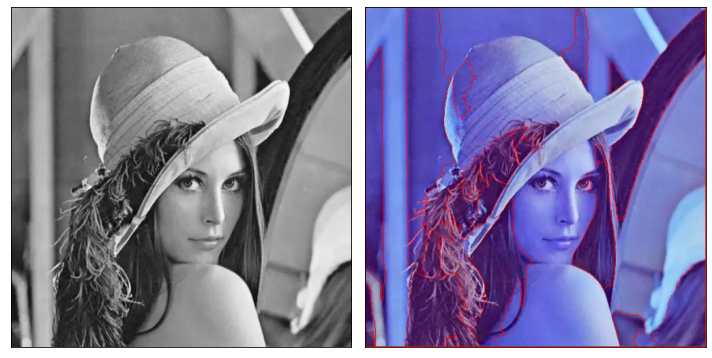

In [10]:
result = Watershed(grayImage)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()